In [32]:
pip install kaggle

In [33]:
#memasukan atau menambahkan library library yang dibutuhkan selama pemrosesan data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#numpy fungsinya untuk numerical computing
#library pandas fungsinya untuk mengolah data, memanipulasi dan menganailisis data
#matplotlib untuk memvisualisasikan data bisa berupa plot, subplotting, grafik, intinya untuk pembuatan plot data
#library seaborn ini perpustakaan diatasnya matplotlib dan dirancang untuk mempermdah pembuatan plot
#Train_test_split adalah teknik yang umum digunakan dalam pembelajaran mesin untuk membagi data menjadi dua subset: satu subset untuk pelatihan model (train set) dan subset lainnya untuk menguji model (test set)
#import MinMaxScaler Fungsi dari MinMaxScaler adalah untuk menjaga distribusi fitur agar memiliki nilai minimum dan maksimum yang diinginkan.
#Sequential: Kelas Sequential digunakan untuk membuat model jaringan saraf berurutan, di mana lapisan-lapisan ditumpuk satu per satu.
#modul tensorflow.keras.layers menggunakan kelas Dense: Lapisan Dense adalah lapisan yang terdiri dari neuron yang terhubung secara penuh.
#pustaka scikit.learn import linear regression ini untuk melakukan penghitungan linear regression
#sklearn.metrics untuk menghitung skor R2 antara nilai aktual (y_true) dan nilai yang diprediksi oleh model (y_pred)

In [34]:
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

#fungsi read.csv menggunakan pustaka pandas as pd untuk membaca file berformat csv. dengan mengcopy link path nya
#df.head fungsnya hanya untuk menampilkan 5 baris teratas dalam file data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [35]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)
df.head()
#ini untuk menghapus colom yang disebutkan dalam tanda kurung dengan menyertakan axis=1 atau inplace=True juga bisa
#dan df.head untuk menampilkan 5 baris teratas saja

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [36]:
df.head()


,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [37]:
df. info()
df. isna(). sum()

#df.info digunakan untuk mengetahui total baris, kolom dalam data tersebut atau secara singkatnya memberikan informasi singkat tentang data frame tersebut
#df.isna sum untuk mengetahui nilai yang hilang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

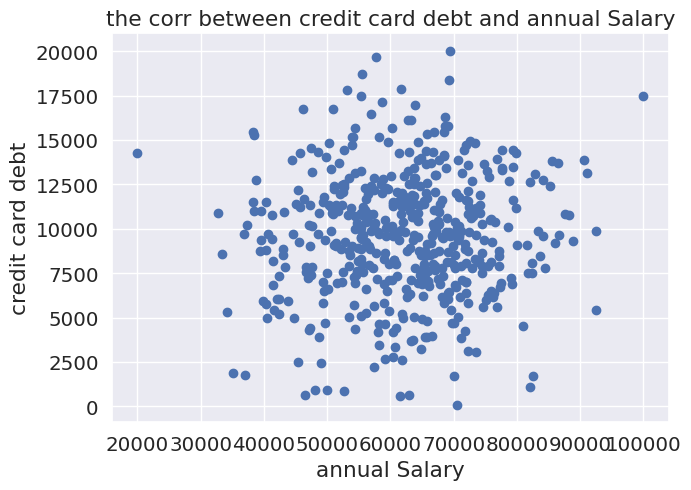

In [38]:
plt.scatter(df['annual Salary'] , df['credit card debt'])   #untuk membuat plot scatter dengan x dan y secara dua dimensi
plt.xlabel('annual Salary')    #untuk memberikan nilai sumbu x sebagai annual salary nya
plt.ylabel('credit card debt')    #untuk memberikan nilai sumbu y sebagai credit card debit
plt.title('the corr between credit card debt and annual Salary') #fungsinya memberikan judul pada plot yang divisualisasikan

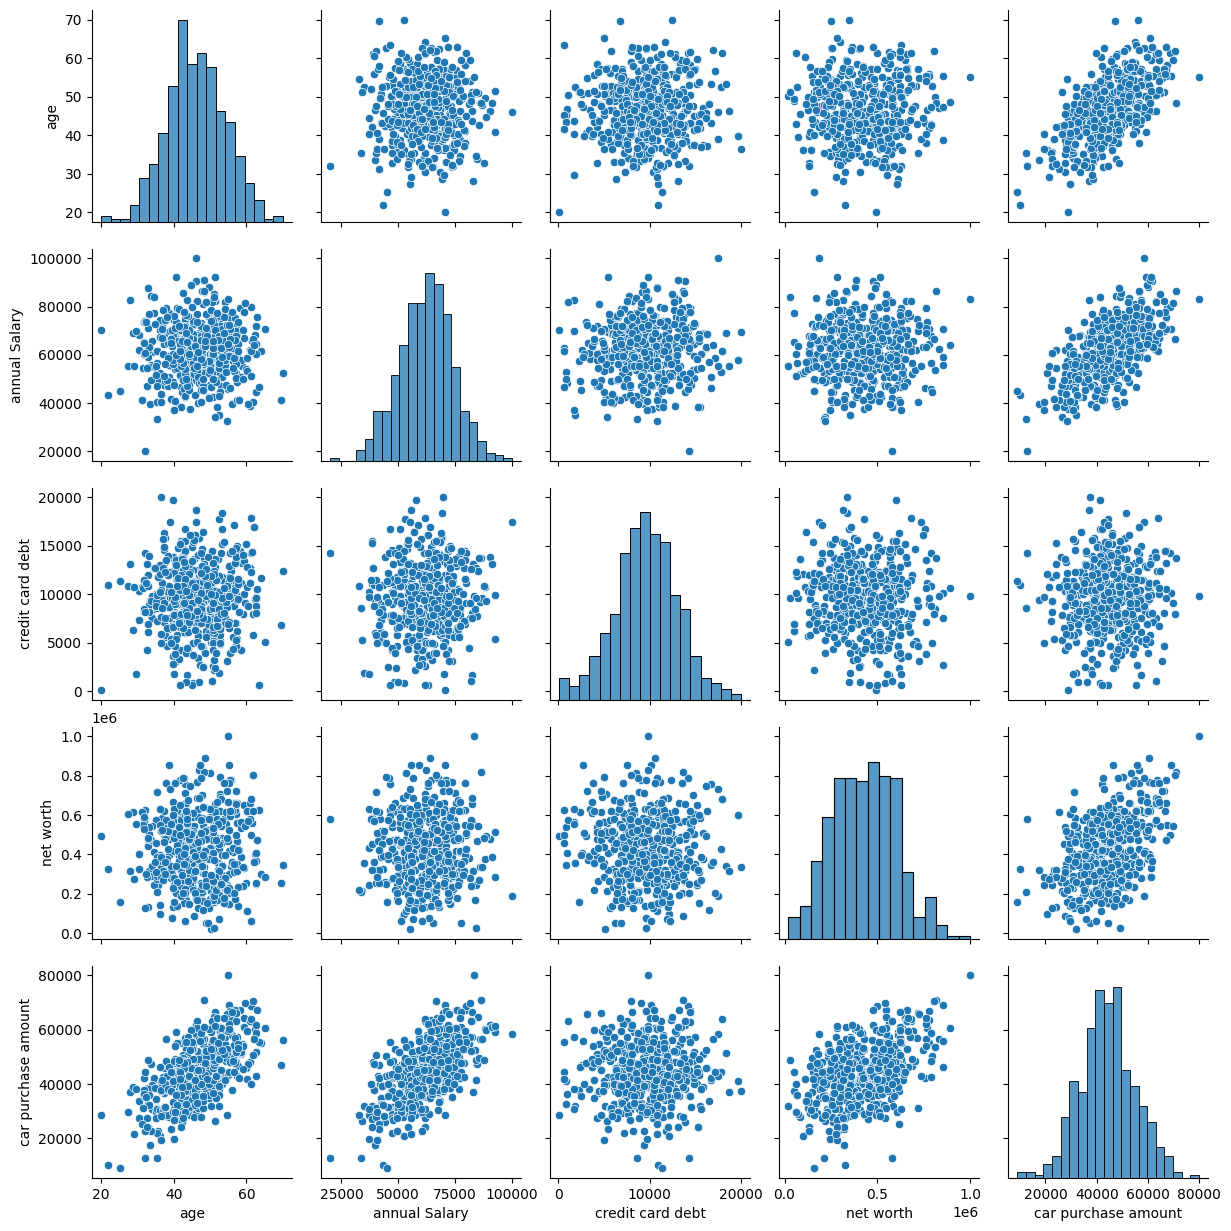

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
#preprocessing untuk membuat ANN nya dengan menentukan scale min dan max nya

scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
#membuat linear regression nya
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999829421538
Test score 0.9999999721319874


In [ ]:
y_pred = lreg.predict(X_test)

membuat model ANN

In [ ]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 28ms/step - loss: 0.0301 - mean_absolute_error: 0.1423 - val_loss: 0.0166 - val_mean_absolute_error: 0.1046
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0969 - val_loss: 0.0135 - val_mean_absolute_error: 0.0923
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0939 - val_loss: 0.0122 - val_mean_absolute_error: 0.0872
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0841 - val_loss: 0.0097 - val_mean_absolute_error: 0.0783
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0769 - val_loss: 0.0084 - val_mean_absolute_error: 0.0727
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0717 - val_loss: 0.0074 - val_mean_absolute_error: 0.0671
Epoch 7/50
10/10 [=========

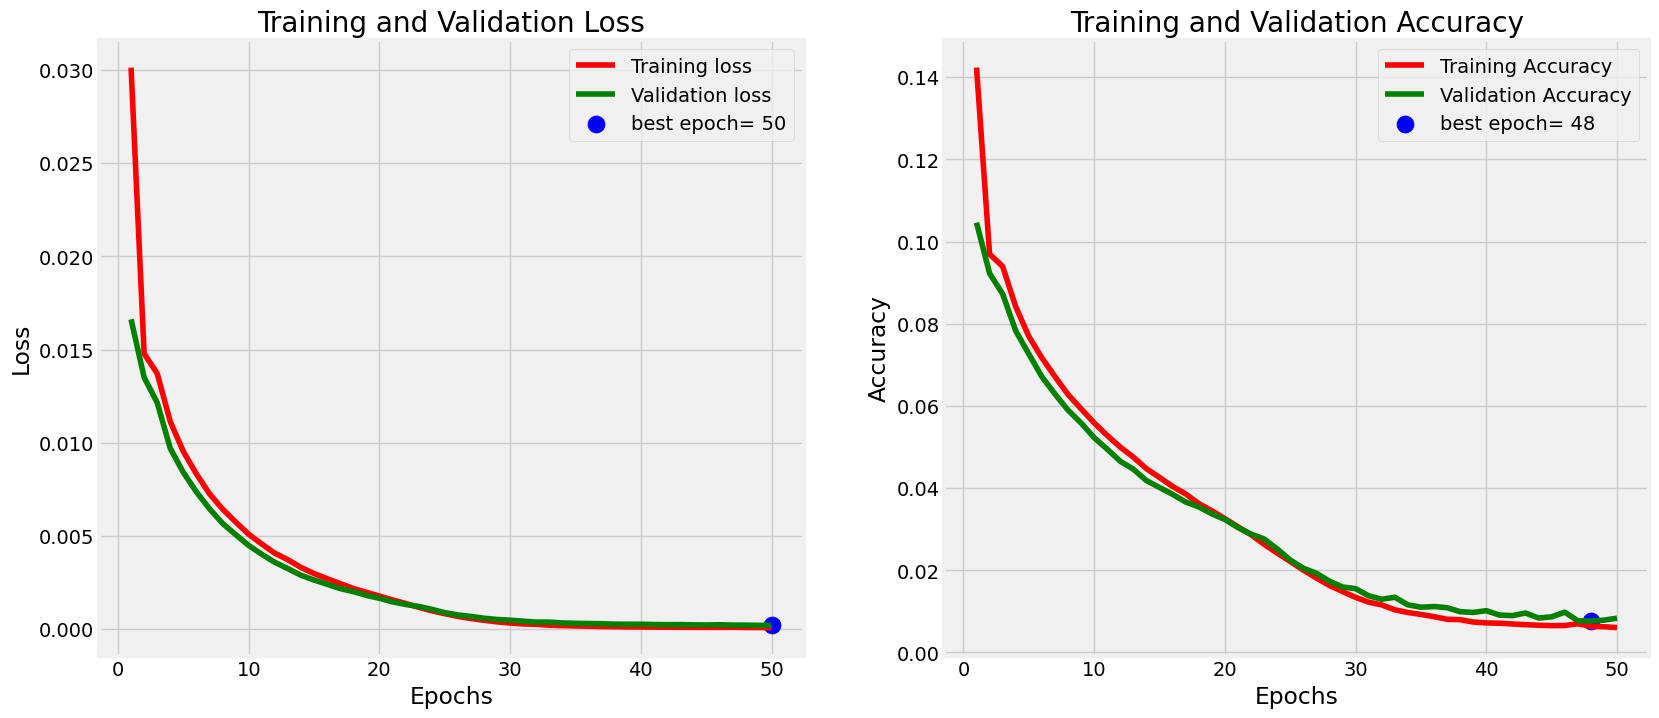

In [ ]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999721319874


In [ ]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 8.2587e-05 - mean_absolute_error: 0.0066


[8.258655725512654e-05, 0.006647940259426832]

In [ ]:
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 70ms/step


array([[269053.8]], dtype=float32)

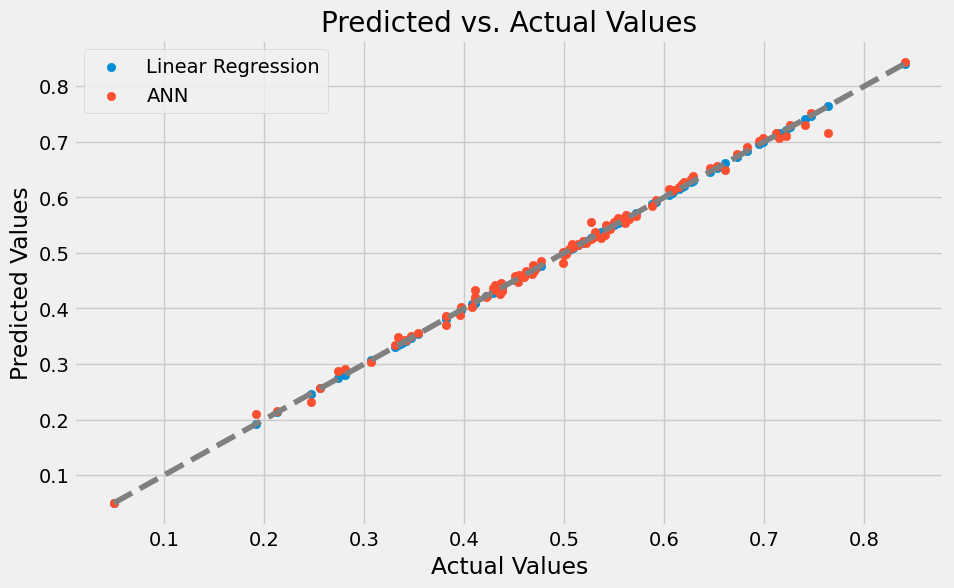

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#import classification report untuk mengetahui laporan klasifikasi data, mulai dari presisi, recall
#import confusion matrix untuk mencetak hasil berupa array numpy. dengan kolom merepresentasikan nilai sebenarnya, dan baris merepresentasikan nilai prediksi

In [ ]:
# Menentukan threshold
threshold = 0.5

# Mengubah prediksi menjadi label kelas
y_pred_class = (y_pred > threshold).astype(int)

# Menghitung classification report
classification_rep = classification_report(y_test > threshold, y_pred > threshold)

# Menampilkan classification report
print(classification_rep)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        48
        True       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



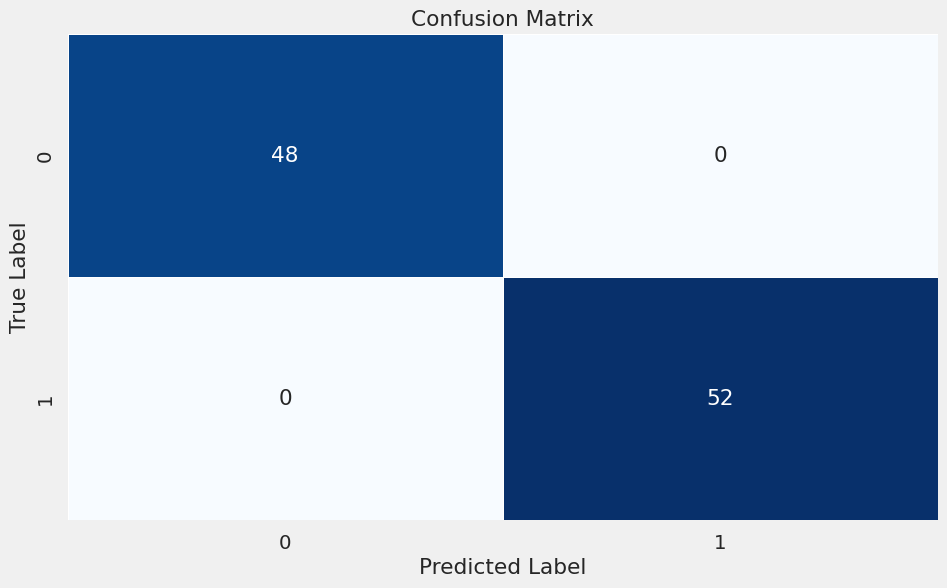

In [ ]:
threshold = 0.5  # Misalnya, gunakan nilai 0.5 sebagai threshold

# Convert predictions to class labels
y_pred_class = (y_pred > threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test > threshold, y_pred > threshold)

# Visualize confusion matrix using heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()